# 🚀 **From Zero to Hero: Metin Sınıflandırma (Text Classification) ile E-Ticaret Ürün Analizi**

Bu notebook, metin sınıflandırma alanında **sıfırdan ileri seviyeye** kadar yol gösterici bir rehberdir. E-ticaret ürün açıklamalarını kullanarak, modern NLP teknikleriyle kategorilendirme işlemini adım adım, **profesyonel bir yaklaşımla** ele alacağız.

## 📚 İçindekiler
1. [Giriş: Metin Sınıflandırma Nedir?](#giris)
2. [Gerekli Kütüphaneler ve Kurulum](#kutuphaneler)
3. [Veri Setinin Tanıtımı ve Keşifsel Veri Analizi (EDA)](#eda)
4. [Veri Ön İşleme ve Temizleme](#on-isleme)
5. [FastText ile Metin Sınıflandırma](#fasttext)
6. [Makine Öğrenmesi Modelleriyle Sınıflandırma](#ml-modeller)
7. [Sonuçların Karşılaştırılması ve Yorumlanması](#sonuclar)
8. [Ek Kaynaklar ve İleri Okuma](#ek-kaynaklar)

## <span style="color:#4F8EF7;font-weight:bold;">1. Giriş: Metin Sınıflandırma Nedir?</span> <a id="giris"></a>

<div style='background-color:#f0f8ff; border-radius:8px; padding:16px; margin-bottom:10px;'>
<span style='font-size:1.2em;'>🔎 <b>Metin sınıflandırma</b>, bir metin parçasının (ör. cümle, paragraf, belge) önceden tanımlanmış kategorilerden birine atanması işlemidir.</span>
</div>

### 🎯 <span style="color:#E67E22;">Neden Önemlidir?</span>

- **Büyük veri çağında**, metin verisinin otomatik olarak anlamlandırılması ve kategorize edilmesi kritik öneme sahiptir.
- İnsan gücüyle yapılamayacak kadar büyük veri setlerinde hızlı ve tutarlı sonuçlar sağlar.

### 💡 <span style="color:#27AE60;">Sektörde Metin Sınıflandırma Kullanım Alanları</span>

| <span style="color:#2980B9;">Kullanım Alanı</span> | <span style="color:#2980B9;">Açıklama</span> |
|:---|:---|
| 📧 <b>Spam Tespiti</b> | E-posta servislerinde spam/ham ayrımı |
| 📰 <b>Haber Kategorilendirme</b> | Haber sitelerinde içeriklerin konuya göre ayrılması |
| 💬 <b>Duygu Analizi</b> | Sosyal medya, müşteri yorumlarında pozitif/negatif/neutral analiz |
| 🛒 <b>Ürün Sınıflandırma</b> | E-ticaret sitelerinde ürünlerin kategoriye atanması |
| 👩‍⚕️ <b>Tıbbi Metin Analizi</b> | Hasta kayıtlarının hastalık türüne göre ayrılması |

<div style='background-color:#fffbe6; border-left:5px solid #f7ca18; padding:10px; margin-top:10px;'><b>Not:</b> Metin sınıflandırma, chatbot'lar, otomatik etiketleme, hukuki belge analizi gibi birçok alanda da yaygın olarak kullanılır.</div>

### <span style="color:#C0392B;">Önemli Noktalar</span>
- <b>Veri kalitesi</b> ve <b>doğru ön işleme</b> adımları, model başarısı için kritik öneme sahiptir.
- <b>Doğru model seçimi</b> ve <b>doğru metriklerle değerlendirme</b> yapılmalıdır.

<div style='background:#eafaf1; border-radius:8px; padding:10px; margin-top:10px;'><b>Flashcard:</b> <span style='color:#16a085;'>Metin sınıflandırma nedir?</span> <br> <i>Bir metin parçasının, önceden tanımlanmış kategorilerden birine otomatik olarak atanması işlemidir.</i></div>

## 2. Gerekli Kütüphaneler ve Kurulum <a id="kutuphaneler"></a>

Çalışmamızda kullanacağımız temel Python kütüphanelerini yüklüyoruz. Bu kütüphaneler veri analizi, görselleştirme ve makine öğrenmesi işlemlerinde bize yardımcı olacak.

In [2]:
# Veri işleme ve analiz için pandas ve numpy
import pandas as pd
import numpy as np

# Görselleştirme için matplotlib ve seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarı mesajlarını kapatmak için
import warnings
warnings.filterwarnings('ignore')

# Grafiklerin daha güzel görünmesi için stil ayarı
plt.style.use('seaborn-v0_8')

## <span style="color:#4F8EF7;font-weight:bold;">3. Veri Setinin Tanıtımı ve Keşifsel Veri Analizi (EDA)</span> <a id="eda"></a>

Kullanacağımız veri seti, e-ticaret platformlarından alınmış ürün açıklamaları ve kategorilerinden oluşmaktadır. Veri seti, dört ana kategoriye ayrılmıştır:
- **Electronics**
- **Household**
- **Books**
- **Clothing & Accessories**

Bu bölümde veri setini yükleyecek, temel istatistikleri ve dağılımları görselleştirecek, açıklama uzunluklarını ve kelime dağılımlarını analiz edeceğiz.

In [3]:
# CSV dosyasını okuyoruz. Kendi kodunuzda ilgili dosya yolunu değiştiriniz. Sütun isimlerini belirtiyoruz.
df = pd.read_csv(r'C:/Users/Cemal/OneDrive/Desktop/2025/Eğitimler/Kairu/Doğal Dil İşleme - NLP Bootcamp Kairu/kairu-nlpbootcamp/hafta_3/ecommerceDataset.csv', names=["category", "description"], header=None)
# İlk 5 satırı görüntüleyelim
df.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
# Veri setinin boyutunu yazdırıyoruz
print(f"Veri seti boyutu: {df.shape}")
# Her sütunda kaç adet eksik değer var?
print("Eksik değerler:")
print(df.isnull().sum())

Veri seti boyutu: (50425, 2)
Eksik değerler:
category       0
description    1
dtype: int64


In [5]:
# Eksik değerleri veri setinden çıkarıyoruz
df.dropna(inplace=True)
print(f"Temizlenmiş veri seti boyutu: {df.shape}")

Temizlenmiş veri seti boyutu: (50424, 2)


In [6]:
# 'Clothing & Accessories' kategorisini daha sade bir hale getiriyoruz
df['category'] = df['category'].replace("Clothing & Accessories", "Clothing_Accessories")

In [7]:
# Açıklama uzunluklarını hesaplayalım
df['desc_length'] = df['description'].apply(lambda x: len(str(x).split()))

### Kategori Dağılımı ve Görselleştirme

Kategorilerin veri setindeki oranlarını pasta grafiği ve çubuk grafik ile gösteriyoruz.

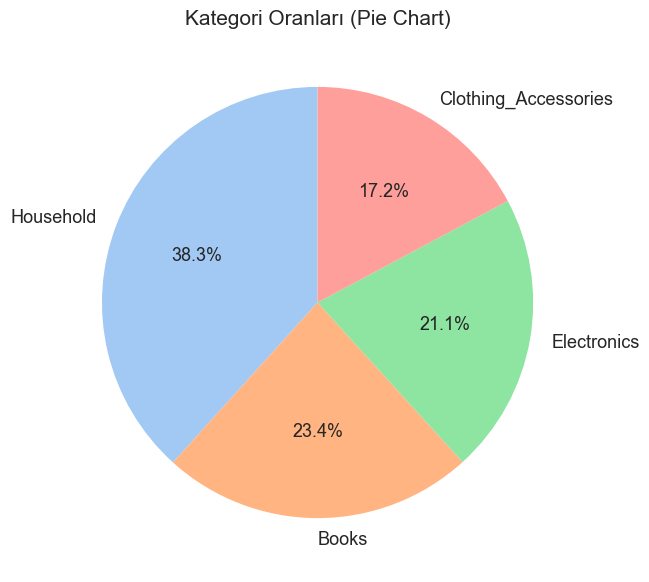

In [8]:
pastel_colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 7))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', colors=pastel_colors, startangle=90, textprops={'fontsize': 13})
plt.title('Kategori Oranları (Pie Chart)', fontsize=15)
plt.ylabel('')
plt.show()

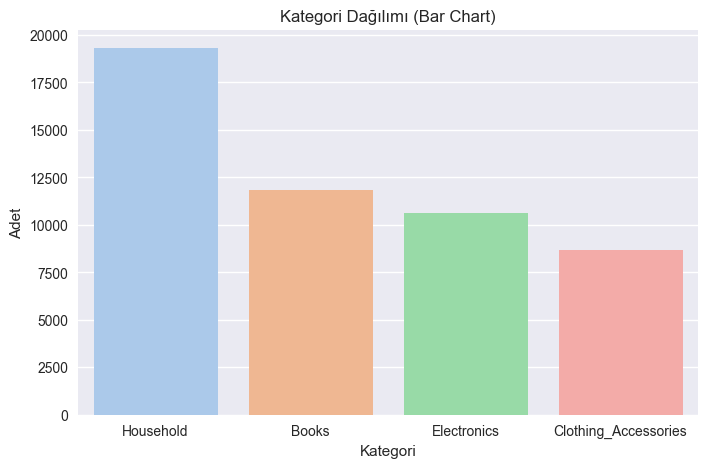

In [9]:
# Kategori dağılımını çubuk grafik ile gösteriyoruz
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette=pastel_colors)
plt.title('Kategori Dağılımı (Bar Chart)')
plt.xlabel('Kategori')
plt.ylabel('Adet')
plt.show()

### Açıklama Uzunluklarının Dağılımı
Ürün açıklamalarının kelime sayılarına göre dağılımını inceliyoruz.

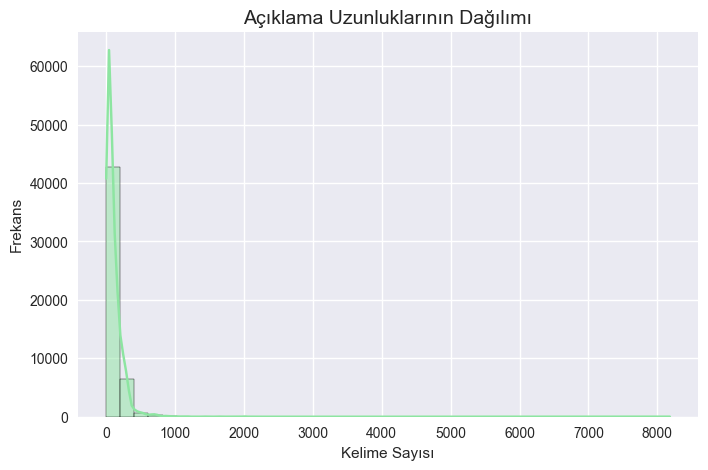

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['desc_length'], bins=40, color=pastel_colors[2], kde=True)
plt.title('Açıklama Uzunluklarının Dağılımı', fontsize=14)
plt.xlabel('Kelime Sayısı')
plt.ylabel('Frekans')
plt.show()

### Kategorilere Göre Açıklama Uzunlukları
Her kategorideki açıklama uzunluklarının dağılımını kutu grafiği (boxplot) ile gösteriyoruz.

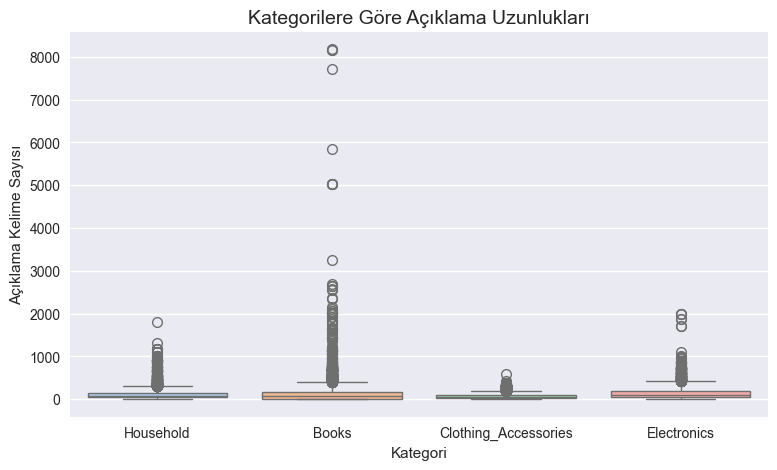

In [11]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x='category', y='desc_length', palette=pastel_colors)
plt.title('Kategorilere Göre Açıklama Uzunlukları', fontsize=14)
plt.xlabel('Kategori')
plt.ylabel('Açıklama Kelime Sayısı')
plt.show()

### En Sık Geçen Kelimeler (WordCloud)
Tüm veri setinde en sık geçen kelimeleri kelime bulutu ile görselleştiriyoruz. Bu, veri setinin genel içeriği hakkında hızlıca fikir verir.

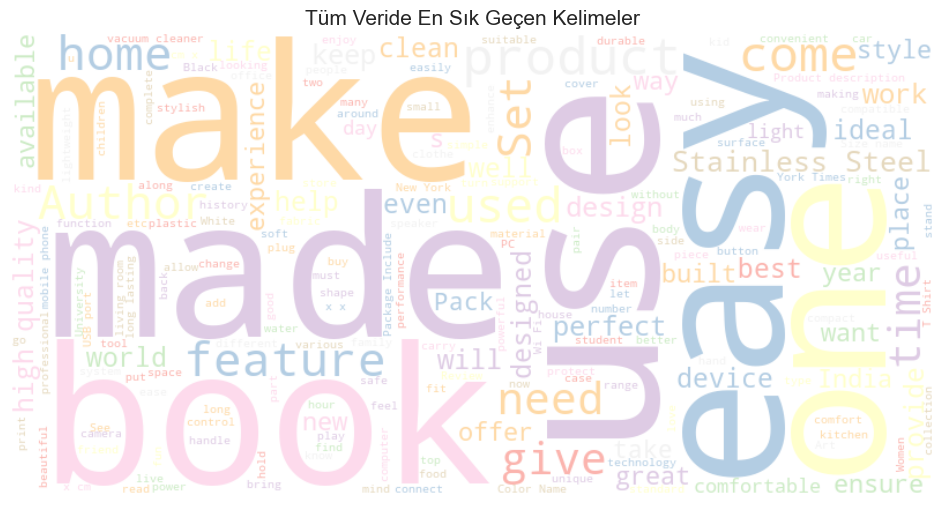

In [12]:
from wordcloud import WordCloud
all_words = ' '.join(df['description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Pastel1').generate(all_words)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tüm Veride En Sık Geçen Kelimeler', fontsize=15)
plt.show()

### Kategorilere Göre Kelime Bulutları
Her kategori için ayrı ayrı en sık geçen kelimeleri görselleştiriyoruz.

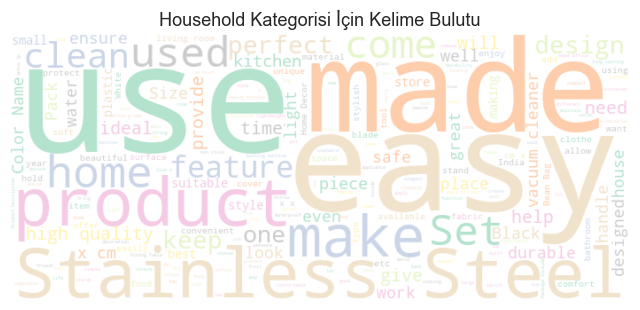

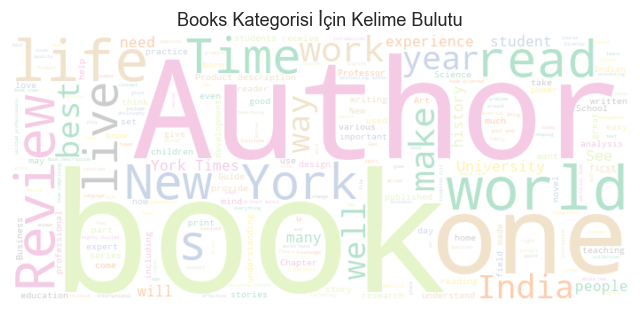

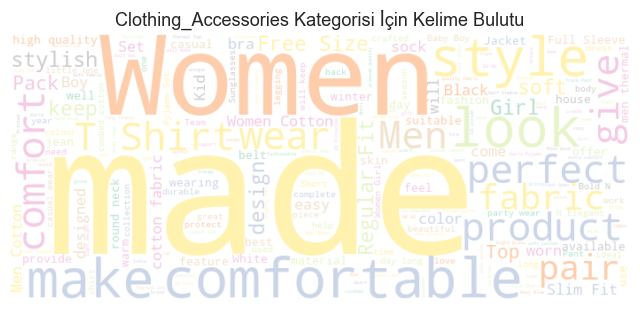

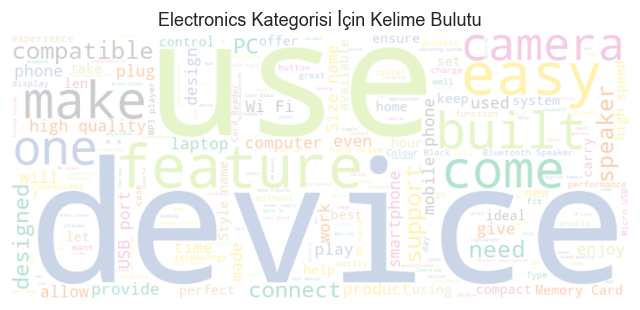

In [13]:
for cat in df['category'].unique():
    plt.figure(figsize=(8,4))
    text = ' '.join(df[df['category']==cat]['description'].astype(str))
    wc = WordCloud(width=700, height=300, background_color='white', colormap='Pastel2').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{cat} Kategorisi İçin Kelime Bulutu', fontsize=13)
    plt.show()

## <span style="color:#4F8EF7;font-weight:bold;">4. Veri Ön İşleme ve Temizleme</span> <a id="on-isleme"></a>

Ham metin verisi, modelleme için uygun değildir. Bu nedenle çeşitli ön işleme adımlarından geçmesi gerekir:
- Küçük harfe çevirme
- Noktalama işaretlerinin kaldırılması
- Satır sonu ve gereksiz boşlukların temizlenmesi
- Stopword (gereksiz kelime) temizliği
- Tokenizasyon (kelimelere ayırma)

Bu adımlar, modelin metni daha iyi anlamasını sağlar.

In [14]:
# Metin ön işleme için gerekli kütüphaneler
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk

# Stopword listesini indiriyoruz (ilk çalıştırmada gereklidir)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# İngilizce stopword'leri ve tokenizer'ı tanımlıyoruz
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r"[\w']+")

In [16]:
# Metin ön işleme fonksiyonu
def preprocess_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Satır sonlarını boşlukla değiştir
    text = re.sub(r'\n', ' ', text)
    # Köşeli parantez içindeki ifadeleri kaldır
    text = re.sub(r'\[.*?\]', '', text)
    # Noktalama işaretlerini kaldır (tek tırnak hariç)
    text = text.translate(str.maketrans('', '', string.punctuation.replace("'", "")))
    # Tokenizasyon (kelimelere ayırma)
    tokens = tokenizer.tokenize(text)
    # Stopword'leri çıkar
    tokens = [word for word in tokens if word not in stop_words]
    # Tekrar metne çevir
    return ' '.join(tokens)

In [17]:
# Her açıklamayı temizleyip yeni bir sütuna ekliyoruz
df['clean_description'] = df['description'].apply(preprocess_text)
# İlk 3 örneği inceleyelim
df[['description', 'clean_description']].head(3)

,description,clean_description
0,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf 'floral' framed painting wood 30 inch x 10...
2,SAF 'UV Textured Modern Art Print Framed' Pain...,saf 'uv textured modern art print framed' pain...


## 5. Makine Öğrenmesi Modelleriyle Sınıflandırma <a id="ml-modeller"></a>

Bu bölümde, klasik makine öğrenmesi algoritmaları ile metin sınıflandırma işlemini gerçekleştireceğiz. Özellikle TF-IDF vektörleştirme ile metinleri sayısal hale getirip, farklı algoritmaların başarımını karşılaştıracağız.

**Kullanılan Modeller:**
- Logistic Regression
- Decision Tree
- Linear SVM
- Random Forest
- SGD Classifier
- Ridge Classifier
- AdaBoost

In [18]:
# Label encoding
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing_Accessories': 3}
df['label'] = df['category'].replace(label_dict)

In [22]:
from sklearn.model_selection import train_test_split
# Eğitim, doğrulama ve test setlerinin hazırlanması
X = df['clean_description']
y = df['label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Eğitim: {len(X_train)}, Doğrulama: {len(X_val)}, Test: {len(X_test)}")

Eğitim: 40339, Doğrulama: 5042, Test: 5043


In [23]:
# TF-IDF vektörleştirme
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [24]:
# Modellerin tanımlanması
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Linear SVM", svm.SVC(kernel='linear', probability=True)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("SGD Classifier", SGDClassifier(loss='hinge')),
    ("Ridge Classifier", RidgeClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

In [25]:
# Modellerin eğitilmesi ve doğrulama sonuçlarının karşılaştırılması
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = []
for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_val_pred = model.predict(X_val_tfidf)
    acc = accuracy_score(y_val, y_val_pred)
    results.append((name, acc))
    print(f"{name} doğrulama doğruluğu: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=list(label_dict.keys())))
    print("-" * 60)

results_df = pd.DataFrame(results, columns=['Model', 'Validation Accuracy']).sort_values(by='Validation Accuracy', ascending=False)
results_df

Logistic Regression doğrulama doğruluğu: 0.9639
Confusion Matrix:
[[1001   38   17    6]
 [  17 1892   11   11]
 [  10   47 1120    5]
 [   4   13    3  847]]
Classification Report:
                      precision    recall  f1-score   support

         Electronics       0.97      0.94      0.96      1062
           Household       0.95      0.98      0.97      1931
               Books       0.97      0.95      0.96      1182
Clothing_Accessories       0.97      0.98      0.98       867

            accuracy                           0.96      5042
           macro avg       0.97      0.96      0.96      5042
        weighted avg       0.96      0.96      0.96      5042

------------------------------------------------------------
Decision Tree doğrulama doğruluğu: 0.9512
Confusion Matrix:
[[ 996   48   10    8]
 [  34 1847   33   17]
 [  16   30 1131    5]
 [   8   31    6  822]]
Classification Report:
                      precision    recall  f1-score   support

         Electronic

,Model,Validation Accuracy
2,Linear SVM,0.973622
5,Ridge Classifier,0.973622
3,Random Forest,0.972035
0,Logistic Regression,0.963903
4,SGD Classifier,0.962912
1,Decision Tree,0.951210
6,AdaBoost,0.693177


### En Başarılı Model ile Test Sonuçları ve Sınıf Bazlı Performans

In [26]:
# En iyi modeli seçip test setinde değerlendirme
best_model_name = results_df.iloc[0]['Model']
best_model = dict(models)[best_model_name]
best_model.fit(X_train_tfidf, y_train)
y_test_pred = best_model.predict(X_test_tfidf)
print(f"Test seti doğruluğu ({best_model_name}): {accuracy_score(y_test, y_test_pred):.4f}")
print(classification_report(y_test, y_test_pred, target_names=list(label_dict.keys())))

Test seti doğruluğu (Linear SVM): 0.9752
                      precision    recall  f1-score   support

         Electronics       0.98      0.96      0.97      1062
           Household       0.97      0.99      0.98      1932
               Books       0.98      0.96      0.97      1182
Clothing_Accessories       0.98      0.99      0.98       867

            accuracy                           0.98      5043
           macro avg       0.98      0.97      0.98      5043
        weighted avg       0.98      0.98      0.98      5043



## 7. Sonuçların Karşılaştırılması ve Yorumlanması <a id="sonuclar"></a>

Bu bölümde, hem FastText hem de klasik makine öğrenmesi modellerinin sonuçlarını karşılaştırıyoruz. Ayrıca, **confusion matrix (karmaşıklık matrisi)** kullanarak modelin hangi sınıflarda başarılı/hatalı olduğunu detaylıca analiz ediyoruz.

### Confusion Matrix (Karmaşıklık Matrisi) Nedir?
- Confusion matrix, modelin tahmin ettiği ve gerçek etiketleri karşılaştırarak hangi sınıfları doğru/yanlış tahmin ettiğini tablo halinde gösterir.
- Satırlar gerçek sınıfları, sütunlar ise modelin tahmin ettiği sınıfları temsil eder.
- Diyagonal üzerindeki değerler doğru tahminleri, diğer hücreler ise karışıklıkları (yanlış tahminleri) gösterir.

**Örnek:**
|   | Tahmin: Elektronik | Tahmin: Ev | ... |
|---|-------------------|------------|-----|
| Gerçek: Elektronik | 1000 | 10 | ... |
| Gerçek: Ev | 5 | 900 | ... |

Bu tablo sayesinde modelin hangi sınıfları karıştırdığını kolayca görebiliriz.

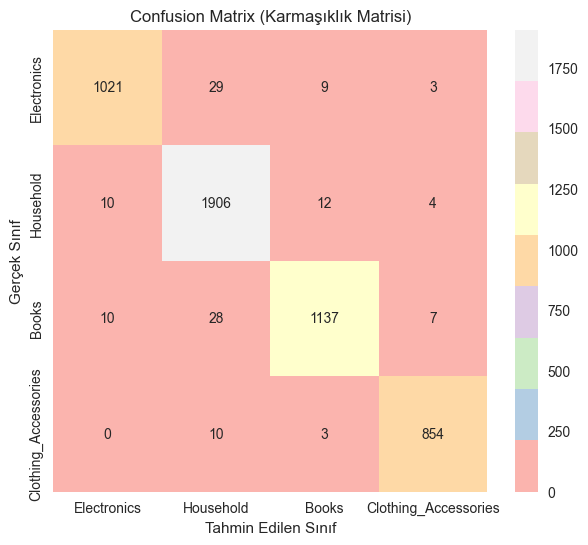

In [27]:
# En iyi modelin confusion matrix'ini çizelim
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test, y_test_pred)
labels = list(label_dict.keys())

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=labels, yticklabels=labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix (Karmaşıklık Matrisi)')
plt.show()

### Confusion Matrix Yorumu

Confusion matrix (karmaşıklık matrisi), bir sınıflandırma modelinin hangi sınıfları doğru veya yanlış tahmin ettiğini detaylıca gösteren bir tablodur. Her bir hücre, modelin tahmin performansının farklı bir yönünü temsil eder:

- **Satırlar (Gerçek Sınıflar):** Her satır, veri setindeki gerçek (doğru) sınıfı gösterir.
- **Sütunlar (Tahmin Edilen Sınıflar):** Her sütun, modelin tahmin ettiği sınıfı gösterir.

#### Matristeki Değerlerin Anlamı

- **Diyagonal Hücreler (Sol üstten sağ alta):** Modelin bir örneği doğru sınıfa atadığı (doğru tahmin) sayıları gösterir. Örneğin, "Books" sınıfı için diyagonal hücredeki değer, modelin gerçekten "Books" olan örnekleri doğru şekilde "Books" olarak tahmin ettiği adettir.
- **Diyagonal Dışı Hücreler:** Modelin bir sınıfı başka bir sınıf ile karıştırdığı (yanlış tahmin) durumları gösterir. Örneğin, "Electronics" satırında ve "Household" sütununda yer alan değer, modelin aslında "Electronics" olan örnekleri yanlışlıkla "Household" olarak tahmin ettiği sayıdır.

#### Örnek Okuma

|           | Tahmin: Electronics | Tahmin: Household | Tahmin: Books | Tahmin: Clothing_Accessories |
|-----------|--------------------|-------------------|---------------|-----------------------------|
| **Gerçek: Electronics** | 120 | 5 | 2 | 3 |
| **Gerçek: Household**   | 4   | 110 | 1 | 2 |
| **Gerçek: Books**       | 1   | 2   | 130 | 0 |
| **Gerçek: Clothing_Accessories** | 2 | 3 | 0 | 115 |

- **120:** Model, 120 adet "Electronics" örneğini doğru tahmin etmiş.
- **5:** Model, 5 adet "Electronics" örneğini yanlışlıkla "Household" olarak tahmin etmiş.
- **0:** Model, "Clothing_Accessories" olan hiçbir örneği "Books" olarak tahmin etmemiş.

#### Profesyonel Analiz

- **Yüksek diyagonal değerler:** Modelin ilgili sınıfta güçlü olduğunu gösterir.
- **Yüksek diyagonal dışı değerler:** Modelin bu iki sınıfı ayırt etmekte zorlandığını ve karıştırdığını gösterir.
- **Satır toplamı:** O sınıfa ait gerçek örneklerin toplam sayısıdır.
- **Sütun toplamı:** Modelin o sınıfa tahmin ettiği toplam örnek sayısıdır.

Bu analiz, modelin hangi sınıflarda başarılı olduğunu, hangi sınıfları ise sıklıkla karıştırdığını açıkça ortaya koyar. Özellikle iş uygulamalarında, hata yapılan sınıflar için ek veri toplama, veri artırma veya model iyileştirme stratejileri geliştirilebilir.

Confusion matrix, sadece genel doğruluk oranı ile yetinmeyip, modelin davranışını sınıf bazında incelemek için vazgeçilmezdir.

## <span style="color:#4F8EF7;font-weight:bold;">8. Ek Kaynaklar ve İleri Okuma</span> <a id="ek-kaynaklar"></a>

- [FastText Documentation](https://fasttext.cc/docs/en/supervised-tutorial.html)
- [Scikit-learn Text Classification Guide](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
- [NLP with Python (NLTK Book)](https://www.nltk.org/book/)
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

---
**Not:** Bu notebook, metin sınıflandırma alanında profesyonel bir yol haritası sunar. Kendi projelerinizde bu adımları özelleştirerek kullanabilirsiniz.

## <span style="color:#4F8EF7;font-weight:bold;">Flashcard: Sık Kullanılan Terimler</span>

<ul>
<li> <b>TF-IDF</b> <span style='color:#7D3C98;'> (Term Frequency-Inverse Document Frequency)</span>: Kelimenin bir belgede ne kadar önemli olduğunu ölçen istatistiksel bir yöntemdir.</li>
<li> <b>Confusion Matrix</b> <span style='color:#7D3C98;'> (Karmaşıklık Matrisi)</span>: Modelin hangi sınıfları doğru/yanlış tahmin ettiğini tablo halinde gösterir.</li>
<li> <b>Precision</b> <span style='color:#7D3C98;'> (Kesinlik)</span>: Modelin pozitif tahminlerinin ne kadarının doğru olduğunu gösterir.</li>
<li> <b>Recall</b> <span style='color:#7D3C98;'> (Duyarlılık)</span>: Modelin gerçek pozitifleri ne kadar doğru bulduğunu gösterir.</li>
<li> <b>F1-Score</b>: Precision ve recall'un harmonik ortalamasıdır.</li>
</ul>

## <span style="color:#E67E22;">🎯 Vurgulu Noktalar</span>

- <span style="background:#f9e79f; font-weight:bold;">Veri ön işleme</span> adımları, metin sınıflandırmanın başarısı için <span style="color:#C0392B;">olmazsa olmazdır</span>.
- <span style="background:#aed6f1; font-weight:bold;">Model karşılaştırması</span> yaparken sadece doğruluk oranına değil, <span style="color:#884EA0;">confusion matrix</span> ve <span style="color:#229954;">F1-score</span> gibi metriklere de bakılmalıdır.
- <span style="background:#fadbd8; font-weight:bold;">Sektör uygulamalarında</span> modelin hızlı, ölçeklenebilir ve yorumlanabilir olması önemlidir.

<div style='background:#f6ddcc; border-radius:8px; padding:10px; margin-top:10px;'><b>Flashcard:</b> <span style='color:#b9770e;'>Confusion Matrix nedir?</span> <br> <i>Modelin hangi sınıfları doğru/yanlış tahmin ettiğini tablo halinde gösteren bir değerlendirme aracıdır.</i></div>

## <span style="color:#4F8EF7;font-weight:bold;">Ekstra: Sektörden Gerçek Metin Sınıflandırma Örnekleri</span>

<ul>
<li> <b>Amazon</b> - Otomatik ürün kategori ataması (milyonlarca ürün için)</li>
<li> <b>Twitter</b> - Tweet'lerin duygu analizi ve konuya göre ayrılması</li>
<li> <b>Google News</b> - Haberlerin otomatik olarak konu başlıklarına ayrılması</li>
<li> <b>Netflix</b> - Kullanıcı yorumlarının olumlu/olumsuz olarak etiketlenmesi</li>
<li> <b>Hastane Bilgi Sistemleri</b> - Doktor notlarının ICD kodlarına otomatik atanması</li>
</ul>

<div style='background:#eafaf1; border-radius:8px; padding:10px; margin-top:10px;'><b>Flashcard:</b> <span style='color:#16a085;'>Duygu analizi nedir?</span> <br> <i>Bir metnin (ör. tweet, yorum) olumlu, olumsuz veya nötr olarak otomatik etiketlenmesidir.</i></div>